# **Prediction of Nephropathy in Diabetic Patients**
---
Amira Ghina Nurfansepta (215150201111026)

## **Data Understanding**

### **Import Library**

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor

import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Penelitian/data_pasien_diabetes.csv')
df.head()

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
0  Adinda Maya Vidianti    11539264   20        0.91                    NaN   
1        Geraldi Satria    11561505    4         NaN                    NaN   
2        Yuni Setyowati    11561162   41         NaN                  >=300   
3                  Ulfa    11224476   26        3.17                  >=300   
4        Dalifa Fatimah    11323947   28      140.40                    NaN   

   Urinary Creatinine  Quantitative UACR  Urinary Albumin  
0                68.3             194.20           103.27  
1                21.8             251.00            54.80  
2                23.7              32.62            77.20  
3                56.3            1110.90            62.49  
4               140.4             240.00           336.90

### **Number of Rows and Columns**

In [ ]:
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

Number of rows = 500
Number of columns = 8


### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    500 non-null    object 
 1   Patient ID              500 non-null    int64  
 2   Age                     500 non-null    int64  
 3   Creatinine              340 non-null    float64
 4   Semi-quantitative UACR  318 non-null    object 
 5   Urinary Creatinine      500 non-null    float64
 6   Quantitative UACR       495 non-null    float64
 7   Urinary Albumin         499 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


### **Descriptive Statistics**

**Numerical Column**

In [ ]:
df.describe()

Patient ID         Age  Creatinine  Urinary Creatinine  \
count  5.000000e+02  500.000000  340.000000          500.000000   
mean   1.083715e+07   32.046000    1.413853          130.517820   
std    2.499121e+06   13.084276    7.638400          345.006133   
min    2.081300e+05    3.000000    0.200000            0.300000   
25%    1.135895e+07   22.000000    0.590000           42.500000   
50%    1.149944e+07   29.000000    0.715000           79.100000   
75%    1.154286e+07   39.000000    0.962500          139.275000   
max    1.158394e+07   82.000000  140.400000         5022.200000   

       Quantitative UACR  Urinary Albumin  
count         495.000000       499.000000  
mean         1326.601111       865.203848  
std          6914.953062      2130.941434  
min             1.900000         0.550000  
25%            21.450000        15.450000  
50%           132.100000        87.700000  
75%           705.300000       503.200000  
max        121845.570000     14267.400000

**Categorical Column**

In [ ]:
df.describe(include='object')

Name Semi-quantitative UACR
count                    500                    318
unique                   363                     14
top     Adinda Maya Vidianti                    <30
freq                       6                     77

### **Duplicated Data**

In [ ]:
print("Number of duplicate data in the dataset:", df.duplicated().sum())

display(df[df.duplicated()])
df[df['Name'] == "Adinda Maya Vidianti"]

Number of duplicate data in the dataset: 1


Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
403  Adinda Maya Vidianti    11539264   20        0.82                    NaN   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
403                76.5              132.1            101.0

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
0    Adinda Maya Vidianti    11539264   20        0.91                    NaN   
92   Adinda Maya Vidianti    11539264   20        0.95                     80   
193  Adinda Maya Vidianti    11539264   21        0.73                    150   
336  Adinda Maya Vidianti    11539264   20        0.82                    NaN   
403  Adinda Maya Vidianti    11539264   20        0.82                    NaN   
469  Adinda Maya Vidianti    11539264   20        0.62                    NaN   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
0                  68.3              194.2           103.27  
92                113.8              117.4           133.60  
193               115.7              121.3           140.40  
336                76.5              132.1           101.00  
403                76.5              132.1           101.00  
469                24.2              174.7            42.20

There is a duplication of data on Adinda Maya Vidianti, so it must be deleted.

### **Missing Value**

In [ ]:
df.isna().sum()

Name                        0
Patient ID                  0
Age                         0
Creatinine                160
Semi-quantitative UACR    182
Urinary Creatinine          0
Quantitative UACR           5
Urinary Albumin             1
dtype: int64

There are many missing values in columns Creatinine and Semi-quantitative UACR, so imputation is necessary. In addition, there are few missing values in columns Quantitative UACR and Urinary Albumin, so they need to be dropped.

## **Data Preprocessing**

### **Remove Duplicated Data**

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

### **Drop Missing Value**

In [ ]:
df = df.dropna(subset=['Urinary Albumin', 'Quantitative UACR'])
df.isna().sum()

Name                        0
Patient ID                  0
Age                         0
Creatinine                156
Semi-quantitative UACR    178
Urinary Creatinine          0
Quantitative UACR           0
Urinary Albumin             0
dtype: int64

### **Input Missing Value**

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

knn_imputer = KNNImputer(n_neighbors=2)
simple_imputer = SimpleImputer(strategy='most_frequent')

df_input = df.copy()
df_input['Creatinine'] = knn_imputer.fit_transform(df_input[['Creatinine']])
df_input['Semi-quantitative UACR'] = simple_imputer.fit_transform(df_input[['Semi-quantitative UACR']])
df_input.head()

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
0  Adinda Maya Vidianti    11539264   20    0.910000                    <30   
1        Geraldi Satria    11561505    4    1.406627                    <30   
2        Yuni Setyowati    11561162   41    1.406627                  >=300   
3                  Ulfa    11224476   26    3.170000                  >=300   
4        Dalifa Fatimah    11323947   28  140.400000                    <30   

   Urinary Creatinine  Quantitative UACR  Urinary Albumin  
0                68.3             194.20           103.27  
1                21.8             251.00            54.80  
2                23.7              32.62            77.20  
3                56.3            1110.90            62.49  
4               140.4             240.00           336.90

In [ ]:
df_input.isna().sum()

Name                      0
Patient ID                0
Age                       0
Creatinine                0
Semi-quantitative UACR    0
Urinary Creatinine        0
Quantitative UACR         0
Urinary Albumin           0
dtype: int64

Missing values have been filled in df_input.

## **Exploratory Data Analysis**

### **Analysing The Features**

**Name**

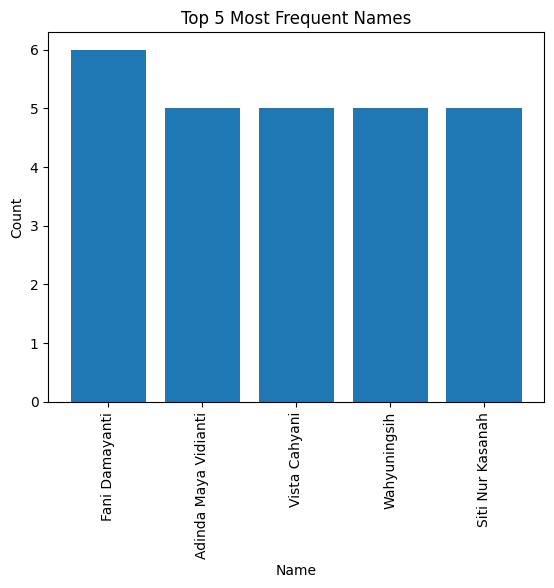

In [ ]:
df_name = df['Name'].value_counts(ascending=False).reset_index()
df_name.columns = ['Name', 'Count']
df_name_head = df_name.head()

plt.bar(df_name_head['Name'], df_name_head['Count'])
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 5 Most Frequent Names')
plt.show()

Patient with the most names in the dataset is Fani Damayanti, which is 6 times.

**Patients ID**

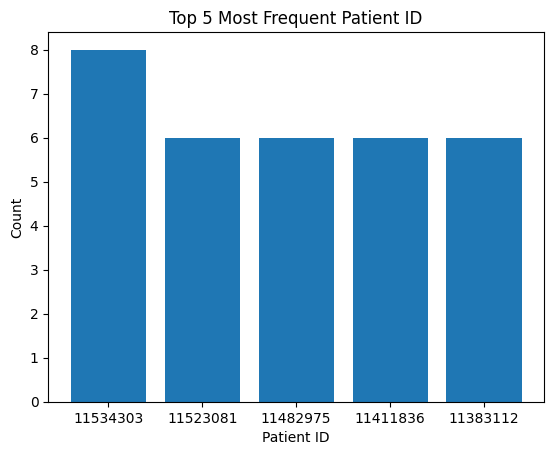

In [ ]:
df_id = df['Patient ID'].value_counts(ascending=False).reset_index()
df_id.columns = ['Patient ID', 'Count']
df_id['Patient ID'] = df_id['Patient ID'].astype(str)
df_id_head = df_id.head()

plt.bar(df_id_head['Patient ID'], df_id_head['Count'])
plt.xlabel('Patient ID')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Patient ID')
plt.show()

In [ ]:
display(df[df['Patient ID'] == 11534303])
df[df['Patient ID'] == 11523081]

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
71            Meytabila    11534303   20        1.61                    NaN   
129          Meytabilla    11534303   20        1.73                     80   
164          Meytabilla    11534303   21        1.59                     80   
187          Meytabilla    11534303   21        1.25                    NaN   
205  Meytabilla Mauludy    11534303   21        1.53                     80   
227          Meytabilla    11534303   21        1.30                     80   
236  Meytabilla Mauludy    11534303   20        2.05                   >300   
321  Meytabilla Mauludy    11534303   20        1.31                   >300   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
71                 58.7            1536.40            902.0  
129                53.1              98.70             52.4  
164               178.7              90.00            160.8  
187                28.1             245.10             68.8  
205                56.7             129.10             73.2  
227               120.0              89.17            107.0  
236               177.2             697.50           1235.6  
321               201.0             601.49           1209.0

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
37   Wahyunignsih    11523081   28        0.38                  >=300   
77   Wahyunignsih    11523081   28        0.41                 >= 300   
151  Wahyuningsih    11523081   28        0.40                  >=300   
302  Wahyuningsih    11523081   28        0.31                   >300   
349  Wahyuningsih    11523081   28        0.36                  >=300   
378  Wahyuningsih    11523081   28        0.45                    NaN   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
37                149.7              267.2            399.8  
77                144.0              509.5            733.7  
151               105.5              237.3            250.2  
302               162.4               42.7             69.4  
349                30.2              753.2            227.7  
378               152.4              112.1            170.8

Patient with the most IDs in the dataset is not the same as the most names. This can occur due to incomplete or typo name writing.

**Age**

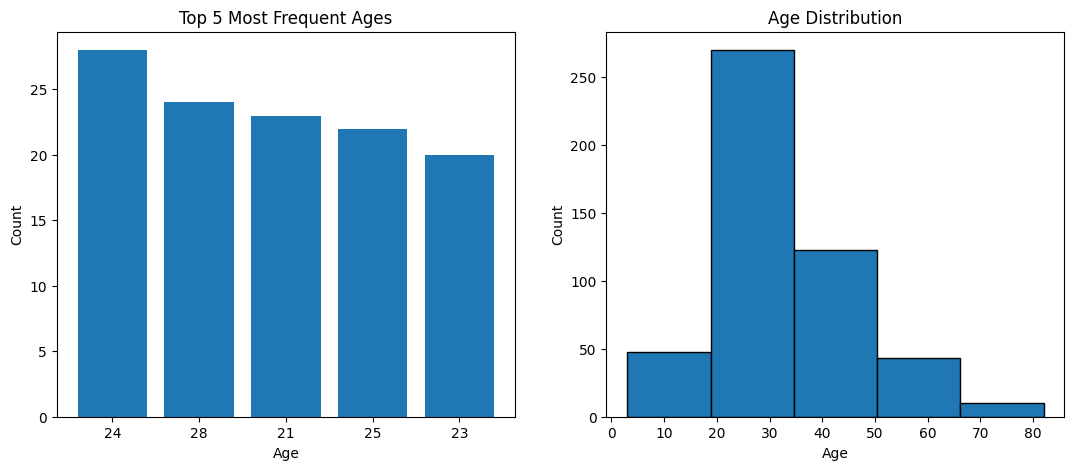

In [ ]:
df_age = df['Age'].value_counts(ascending=False).reset_index()
df_age.columns = ['Age', 'Count']
df_age['Age'] = df_age['Age'].astype(str)
df_age_head = df_age.head()

f,ax=plt.subplots(1, 2, figsize=(13,5))
ax[0].bar(df_age_head['Age'], df_age_head['Count'])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 5 Most Frequent Ages')
ax[1].hist(df['Age'], bins=5, edgecolor='k')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].set_title('Age Distribution')
plt.show()

Patients aged 24 are the most common patients in the dataset.

**Creatinine**

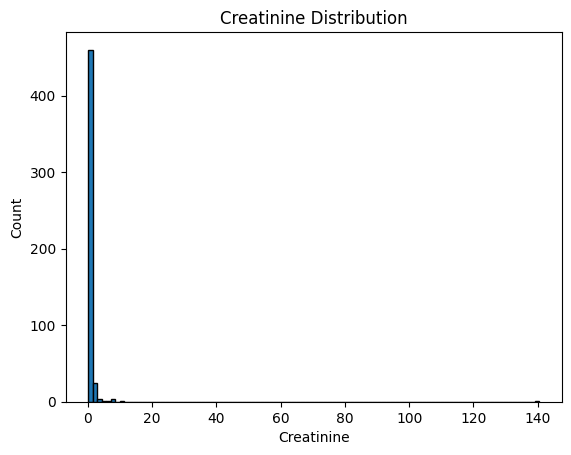

In [ ]:
plt.hist(df_input['Creatinine'], bins=100, edgecolor='k')
plt.xlabel('Creatinine')
plt.ylabel('Count')
plt.title('Creatinine Distribution')
plt.show()

**Semi-quantitative UACR**

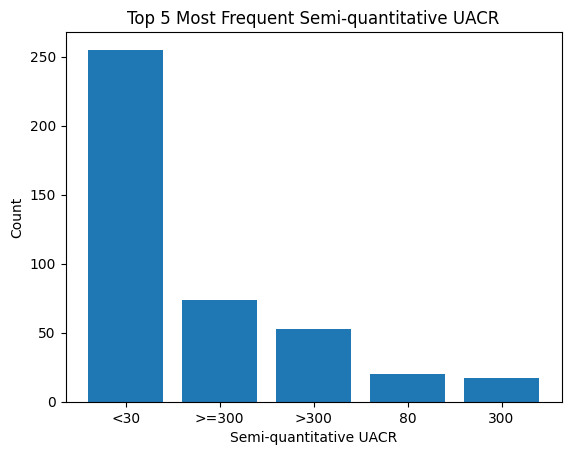

In [ ]:
df_sq = df_input['Semi-quantitative UACR'].value_counts(ascending=False).reset_index()
df_sq.columns = ['Semi-quantitative UACR', 'Count']
df_sq_head = df_sq.head()

plt.bar(df_sq_head['Semi-quantitative UACR'], df_sq_head['Count'])
plt.xlabel('Semi-quantitative UACR')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Semi-quantitative UACR')
plt.show()

In [ ]:
df_sq

Semi-quantitative UACR  Count
0                     <30    255
1                   >=300     74
2                    >300     53
3                      80     20
4                     300     17
5                     <80     15
6                     100     12
7                      30     11
8                     200     11
9                   >=150      9
10                    150      7
11                 >= 300      7
12                   >150      2
13                 >= 150      1

There are 13 classes of Semi-quantitative UACR and the most class in the dataset is <30.

### **Label Encoding**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df_input['Semi-quantitative UACR'] = label_encoder.fit_transform(df_input['Semi-quantitative UACR'])

**Urinary Creatinine**

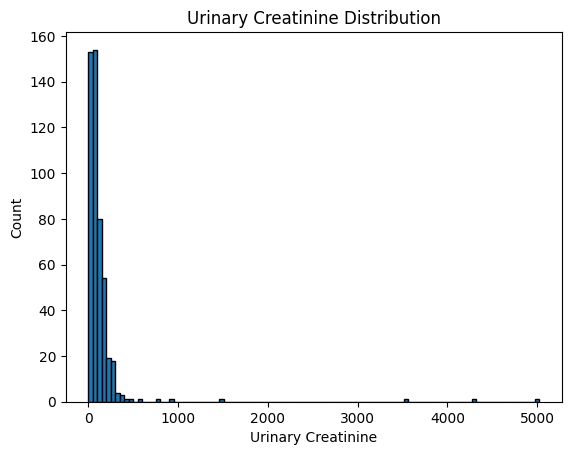

In [ ]:
plt.hist(df['Urinary Creatinine'], bins=100, edgecolor='k')
plt.xlabel('Urinary Creatinine')
plt.ylabel('Count')
plt.title('Urinary Creatinine Distribution')
plt.show()

**Quantitative UACR**

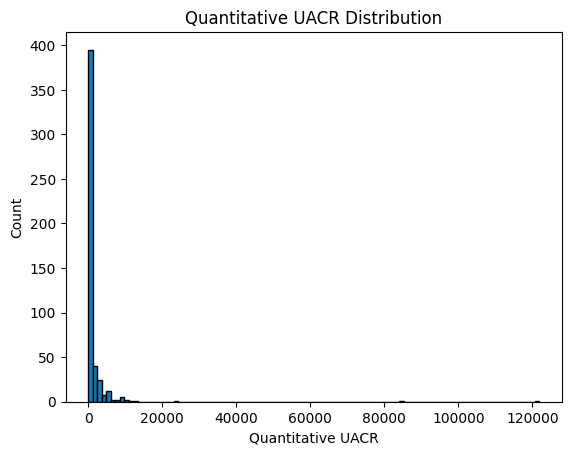

In [ ]:
plt.hist(df['Quantitative UACR'], bins=100, edgecolor='k')
plt.xlabel('Quantitative UACR')
plt.ylabel('Count')
plt.title('Quantitative UACR Distribution')
plt.show()

**Urinary Albumin**

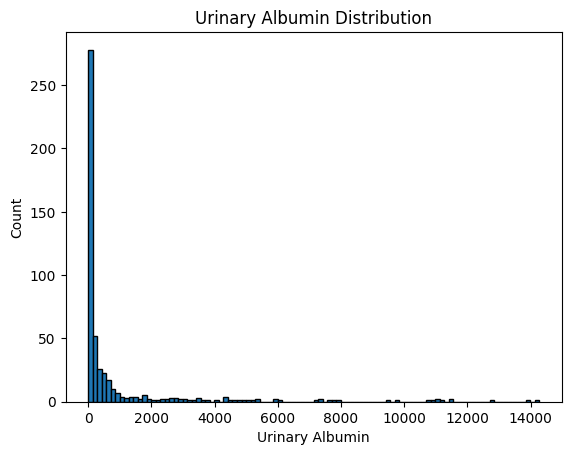

In [ ]:
plt.hist(df['Urinary Albumin'], bins=100, edgecolor='k')
plt.xlabel('Urinary Albumin')
plt.ylabel('Count')
plt.title('Urinary Albumin Distribution')
plt.show()

### **Nephropaty**

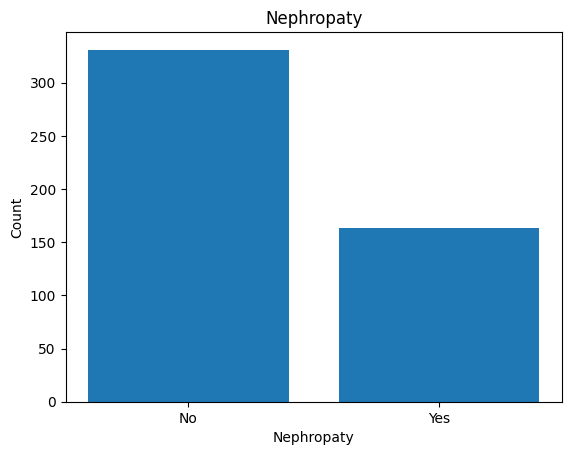

In [ ]:
df_neph = pd.DataFrame({'Urinary Albumin': df['Urinary Albumin']})
df_neph['Nephropaty'] = df_neph['Urinary Albumin'].apply(lambda x: 'Yes' if x > 300 else "No")
df_neph = df_neph['Nephropaty'].value_counts(ascending=False).reset_index()
df_neph.columns = ['Nephropaty', 'Count']

plt.bar(df_neph['Nephropaty'], df_neph['Count'])
plt.xlabel('Nephropaty')
plt.ylabel('Count')
plt.title('Nephropaty')
plt.show()

More patients who did not have nephropathy than those who did.

### **Correlation**

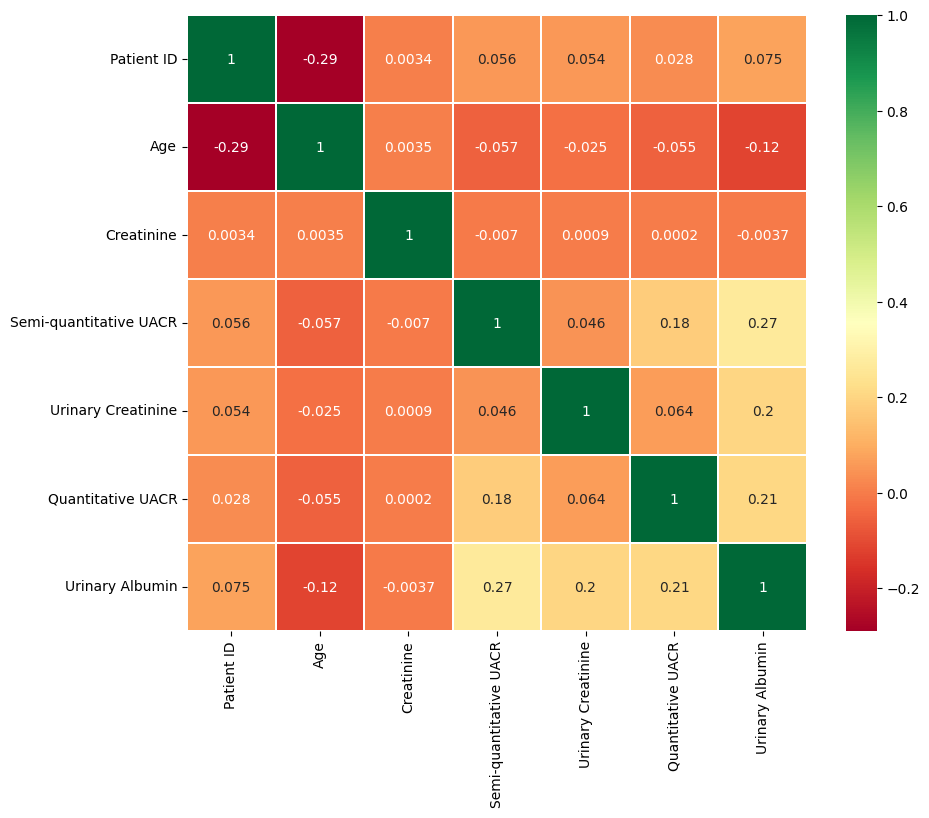

In [ ]:
sns.heatmap(df_input.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- The determinant of a patient being affected by nephropathy is when the Urinary Albumin or Quantitative UACR value is more than 300.
- Urinary Albumin and Semi-quantitative UACR are the most correlated features.
- The correlation between Urinary Creatinine or Quantitative UACR and Urinary Albumin is also high.

## **Modelling (Prediction)**

### **Split Dataset**

**Patient ID, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X1 = df_input.drop(['Name', 'Urinary Albumin','Creatinine', 'Age'], axis=1)
y1 = df_input['Urinary Albumin']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X2 = df_input.drop(['Name', 'Urinary Albumin', 'Patient ID', 'Creatinine'], axis=1)
y2 = df_input['Urinary Albumin']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Patient ID, Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X3 = df_input.drop(['Name', 'Urinary Albumin', 'Creatinine'], axis=1)
y3 = df_input['Urinary Albumin']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X4 = df_input.drop(['Name', 'Urinary Albumin', 'Age', 'Creatinine', 'Patient ID'], axis=1)
y4 = df_input['Urinary Albumin']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Quantitative UACR and Urinary Creatinine**

In [ ]:
X5 = df_input.drop(['Name', 'Urinary Albumin', 'Age', 'Creatinine', 'Patient ID', 'Semi-quantitative UACR'], axis=1)
y5 = df_input['Urinary Albumin']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

### **Modelling and Evaluation Function**

In [ ]:
def evaluation(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return mae, mse, rmse

def rmse_cv(model, X, y):
  rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
  return rmse

In [ ]:
func = np.vectorize(lambda x: 'yes' if x > 300 else 'no')
test1 = func(y_test1)
test2 = func(y_test2)
test3 = func(y_test3)
test4 = func(y_test4)
test5 = func(y_test5)

In [ ]:
models1 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])
models2 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])
models3 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])
models4 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])
models5 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])

In [ ]:
stacking_models = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])

### **Huber**

**Original**

MAE: 757.3761942229162
MSE: 3467972.6283696154
RMSE: 1862.2493464543397
RMSE Cross-Validation: 2413.368956802194
Accuracy: 0.8484848484848485


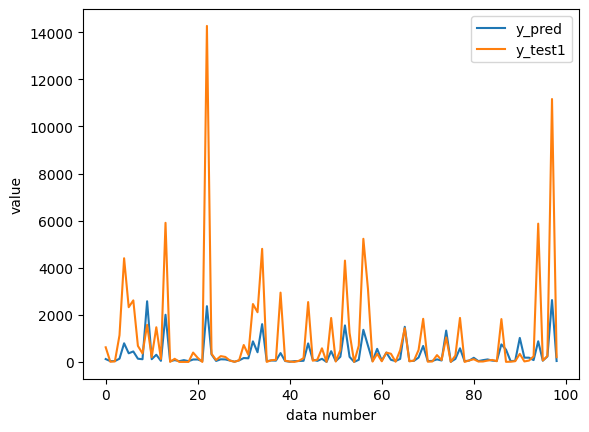

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train1, y_train1)
y_pred = huber_ori.predict(X_test1)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models1 = models1.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 771.4546598382209
MSE: 3994129.0029215324
RMSE: 1998.5317117627962
RMSE Cross-Validation: 3257.5303489180405
Accuracy: 0.9090909090909091


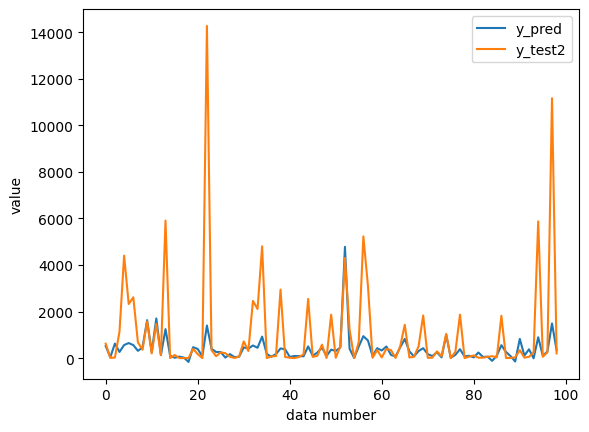

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train2, y_train2)
y_pred = huber_ori.predict(X_test2)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models2 = models2.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 757.3770715650969
MSE: 3467973.227524127
RMSE: 1862.249507322831
RMSE Cross-Validation: 2445.7313577986265
Accuracy: 0.8484848484848485


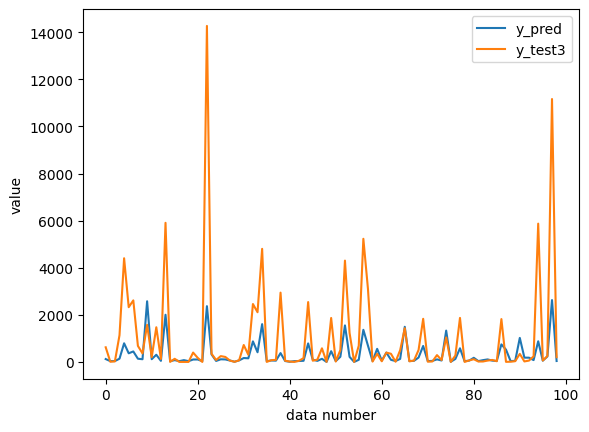

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train3, y_train3)
y_pred = huber_ori.predict(X_test3)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models3 = models3.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 772.3338938910773
MSE: 3996079.8563965647
RMSE: 1999.0197238638154
RMSE Cross-Validation: 3255.4848699775607
Accuracy: 0.898989898989899


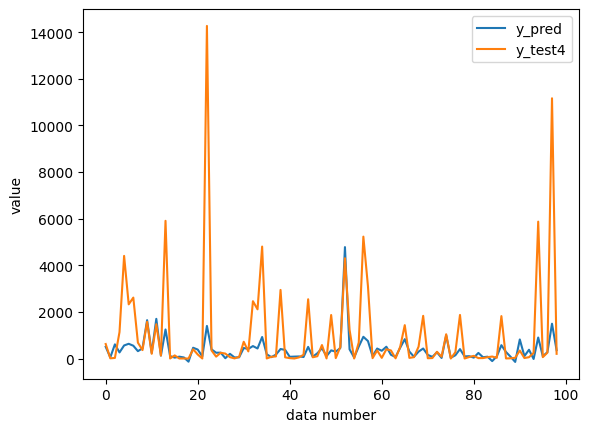

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train4, y_train4)
y_pred = huber_ori.predict(X_test4)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models4 = models4.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 721.4201744758631
MSE: 3330931.3545923545
RMSE: 1825.08393083506
RMSE Cross-Validation: 3256.8666405249846
Accuracy: 0.8585858585858586


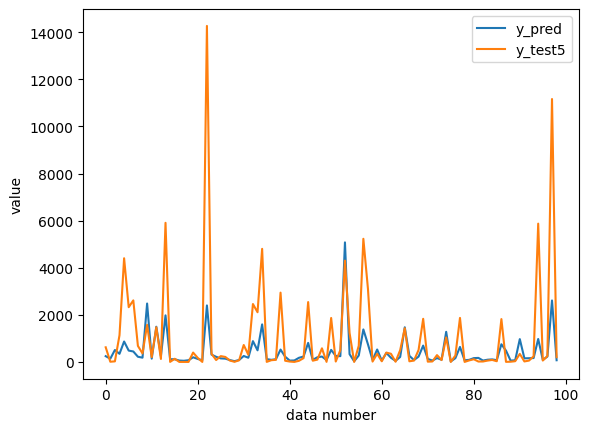

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train5, y_train5)
y_pred = huber_ori.predict(X_test5)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models5 = models5.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

**Tuning**

MAE: 757.3682829453933
MSE: 3467989.6836589123
RMSE: 1862.25392566613
RMSE Cross-Validation: 2413.386338632976
Accuracy: 0.8484848484848485


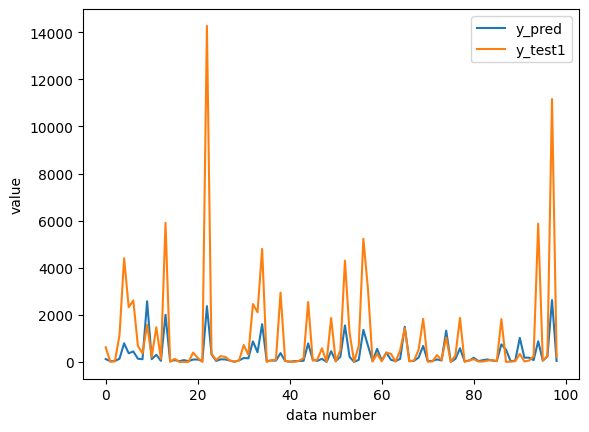

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train1, y_train1)
y_pred = huber.predict(X_test1)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 736.1605785062732
MSE: 3649601.556261088
RMSE: 1910.3930371159458
RMSE Cross-Validation: 3256.0951216549147
Accuracy: 0.9090909090909091


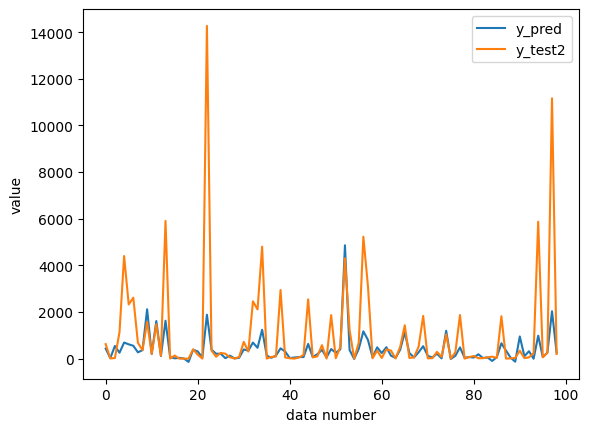

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train2, y_train2)
y_pred = huber.predict(X_test2)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 757.3695850412416
MSE: 3467993.351172758
RMSE: 1862.2549103634437
RMSE Cross-Validation: 2413.3732491017063
Accuracy: 0.8484848484848485


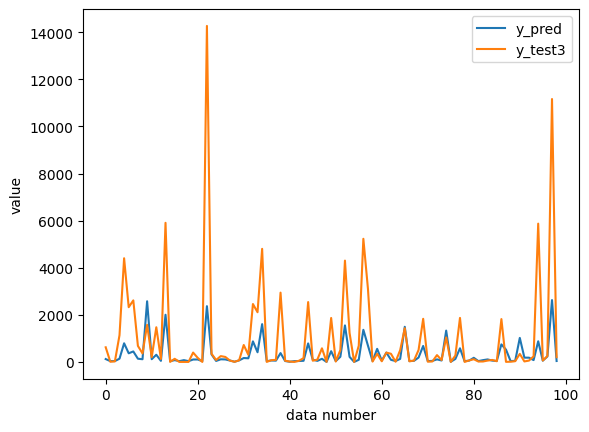

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train3, y_train3)
y_pred = huber.predict(X_test3)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 715.5309167769467
MSE: 3277996.5377477803
RMSE: 1810.5238296547716
RMSE Cross-Validation: 3263.352795601272
Accuracy: 0.8585858585858586


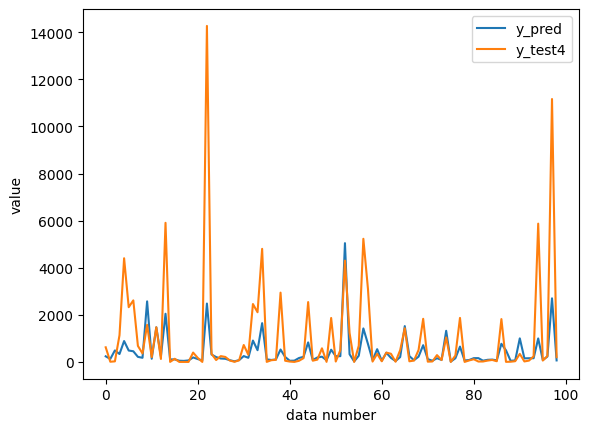

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train4, y_train4)
y_pred = huber.predict(X_test4)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 713.8394456858504
MSE: 3282871.4986320673
RMSE: 1811.8696141367534
RMSE Cross-Validation: 3243.4085837482576
Accuracy: 0.8585858585858586


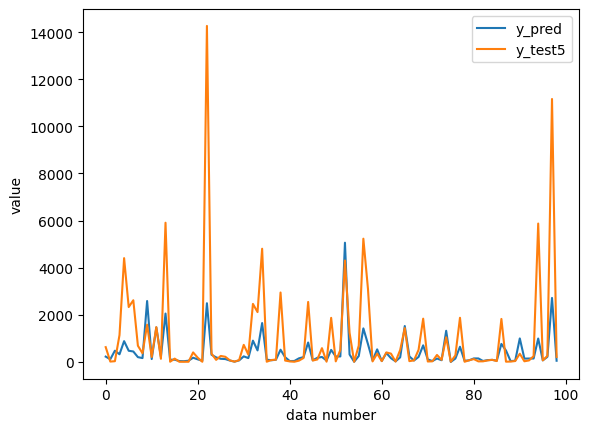

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train5, y_train5)
y_pred = huber.predict(X_test5)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Random Forest**

**Original**

MAE: 303.38585757575777
MSE: 673129.6832448271
RMSE: 820.4448081649533
RMSE Cross-Validation: 1021.4959491402884
Accuracy: 0.9797979797979798


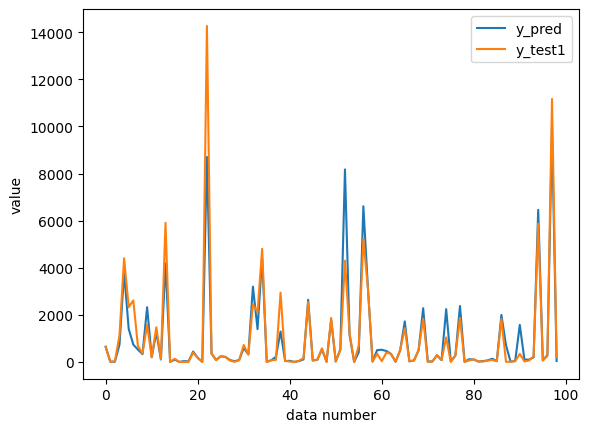

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train1, y_train1)
y_pred = random_forest_ori.predict(X_test1)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models1 = models1.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 307.45938585858585
MSE: 545231.5699072407
RMSE: 738.3979752865257
RMSE Cross-Validation: 980.3643760427412
Accuracy: 0.9595959595959596


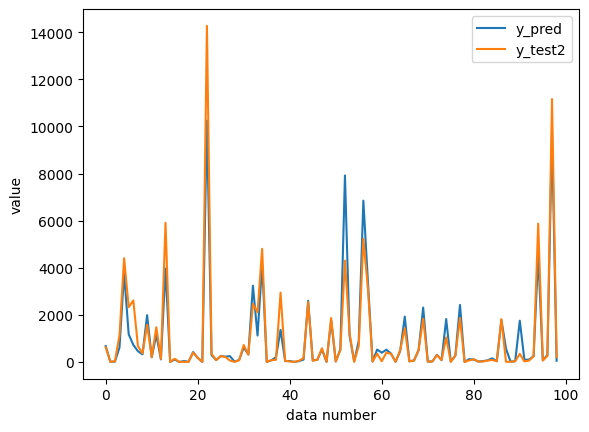

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train2, y_train2)
y_pred = random_forest_ori.predict(X_test2)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models2 = models2.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 320.45415555555564
MSE: 673737.0365125444
RMSE: 820.8148612887953
RMSE Cross-Validation: 1030.1683060942055
Accuracy: 0.9595959595959596


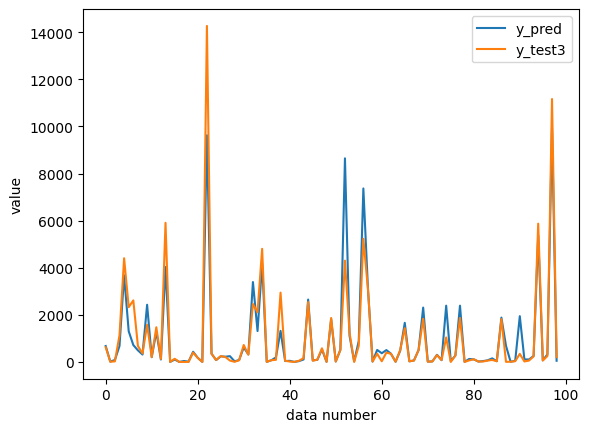

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train3, y_train3)
y_pred = random_forest_ori.predict(X_test3)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models3 = models3.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 281.3347515151516
MSE: 502242.5899188266
RMSE: 708.6907576078769
RMSE Cross-Validation: 976.7365178614857
Accuracy: 0.9696969696969697


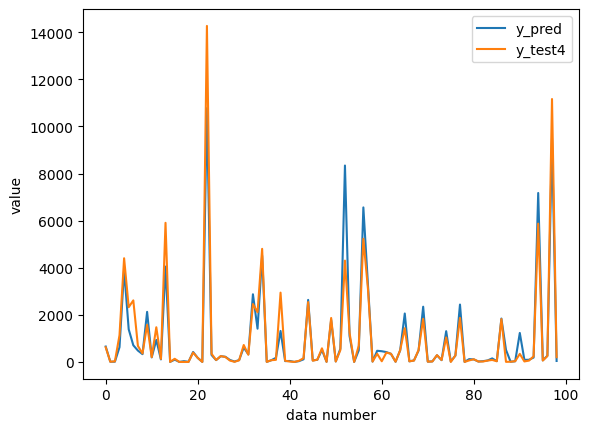

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train4, y_train4)
y_pred = random_forest_ori.predict(X_test4)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models4 = models4.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 235.5572383838385
MSE: 340964.7188435228
RMSE: 583.9218430950522
RMSE Cross-Validation: 971.3675965441286
Accuracy: 0.9797979797979798


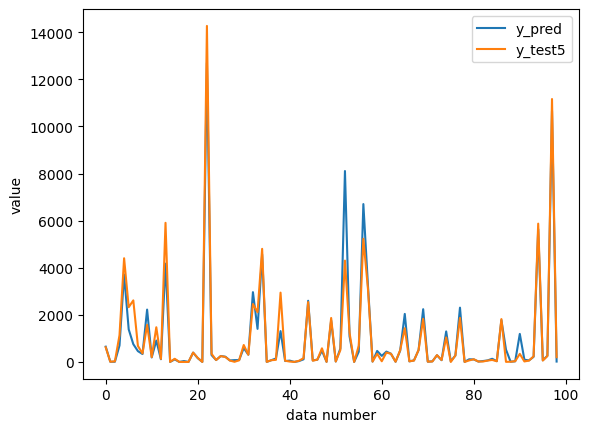

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train5, y_train5)
y_pred = random_forest_ori.predict(X_test5)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models5 = models5.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

**Tuning**

MAE: 291.4850050505049
MSE: 607300.0556345925
RMSE: 779.2945884802438
RMSE Cross-Validation: 1028.227471268288
Accuracy: 0.9797979797979798


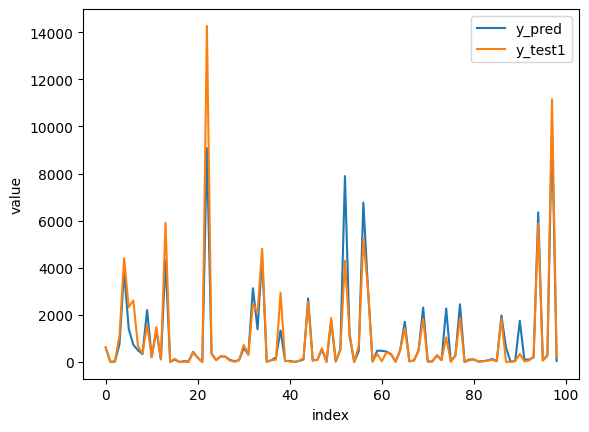

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train1, y_train1)
y_pred = random_forest.predict(X_test1)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 311.16377777777774
MSE: 575125.8949666461
RMSE: 758.3705525444973
RMSE Cross-Validation: 984.1671217330025
Accuracy: 0.9595959595959596


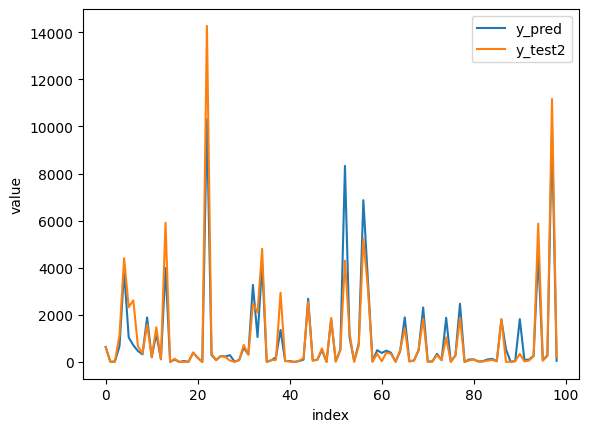

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train2, y_train2)
y_pred = random_forest.predict(X_test2)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 307.9265232323231
MSE: 608323.8785621414
RMSE: 779.9512026801045
RMSE Cross-Validation: 1033.9509753806917
Accuracy: 0.9696969696969697


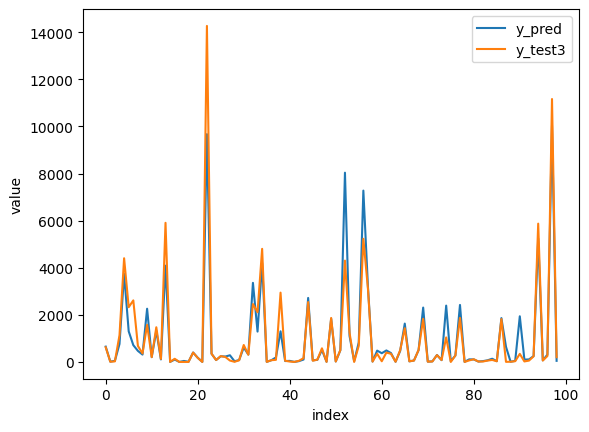

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train3, y_train3)
y_pred = random_forest.predict(X_test3)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 273.863295959596
MSE: 463546.57446579123
RMSE: 680.8425474849462
RMSE Cross-Validation: 978.9636023952517
Accuracy: 0.9696969696969697


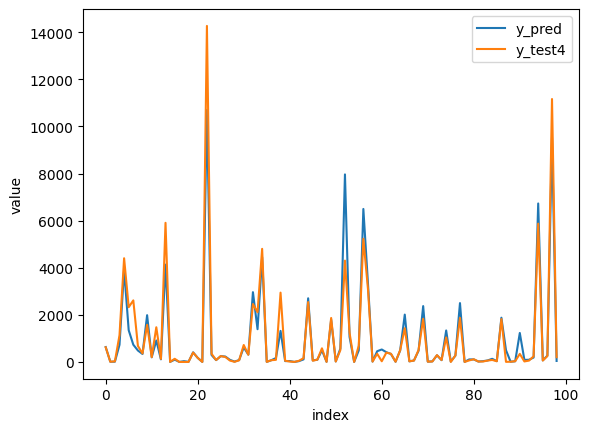

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train4, y_train4)
y_pred = random_forest.predict(X_test4)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 238.95751414141415
MSE: 359417.66196685866
RMSE: 599.5145218982261
RMSE Cross-Validation: 966.8080674708308
Accuracy: 0.9797979797979798


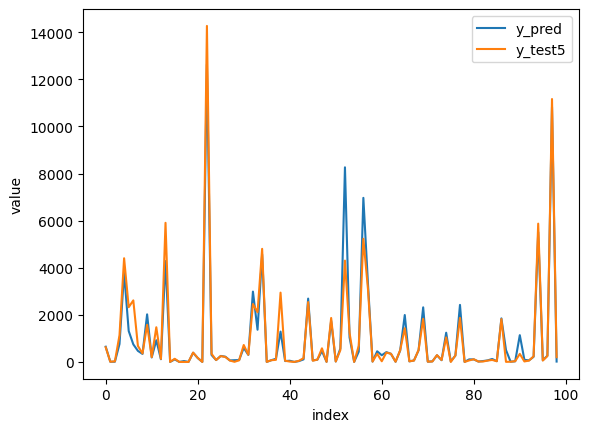

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train5, y_train5)
y_pred = random_forest.predict(X_test5)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

### **CatBoost**

**Original**

Streaming output truncated to the last 5000 lines.
6:	learn: 1882.1480631	total: 7.83ms	remaining: 1.11s
7:	learn: 1855.1568840	total: 9.27ms	remaining: 1.15s
8:	learn: 1820.2813587	total: 10.6ms	remaining: 1.17s
9:	learn: 1789.3860246	total: 11.9ms	remaining: 1.18s
10:	learn: 1758.6048309	total: 13.1ms	remaining: 1.18s
11:	learn: 1726.8951484	total: 14.3ms	remaining: 1.17s
12:	learn: 1696.7356110	total: 15.5ms	remaining: 1.18s
13:	learn: 1667.7250111	total: 16.8ms	remaining: 1.18s
14:	learn: 1643.2576740	total: 19.5ms	remaining: 1.28s
15:	learn: 1616.0214770	total: 20.8ms	remaining: 1.28s
16:	learn: 1588.8255798	total: 22.1ms	remaining: 1.27s
17:	learn: 1561.4749547	total: 23.3ms	remaining: 1.27s
18:	learn: 1538.1264386	total: 24.5ms	remaining: 1.27s
19:	learn: 1513.2064315	total: 25.8ms	remaining: 1.26s
20:	learn: 1489.9774061	total: 27ms	remaining: 1.26s
21:	learn: 1467.3340313	total: 28.2ms	remaining: 1.25s
22:	learn: 1443.2444208	total: 29.4ms	remaining: 1.25s
23:	learn: 1422.3983

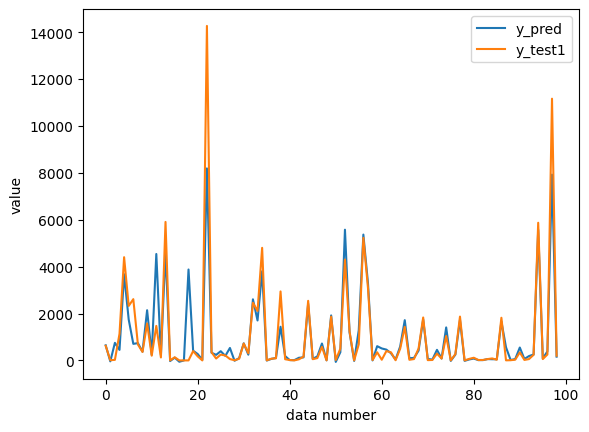

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train1, y_train1)
y_pred = catboost_ori.predict(X_test1)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models1 = models1.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
6:	learn: 1886.5698395	total: 19.4ms	remaining: 2.75s
7:	learn: 1854.9935424	total: 23.2ms	remaining: 2.87s
8:	learn: 1825.9033216	total: 25ms	remaining: 2.75s
9:	learn: 1794.1394702	total: 26.7ms	remaining: 2.64s
10:	learn: 1765.2755102	total: 29.6ms	remaining: 2.66s
11:	learn: 1734.1497552	total: 32.6ms	remaining: 2.68s
12:	learn: 1705.9796441	total: 34.6ms	remaining: 2.63s
13:	learn: 1673.0613858	total: 36.4ms	remaining: 2.56s
14:	learn: 1641.6784846	total: 38.8ms	remaining: 2.55s
15:	learn: 1612.8678890	total: 41.4ms	remaining: 2.55s
16:	learn: 1591.9249445	total: 43.7ms	remaining: 2.52s
17:	learn: 1567.4016549	total: 46.1ms	remaining: 2.51s
18:	learn: 1544.1447079	total: 47.3ms	remaining: 2.44s
19:	learn: 1519.0017750	total: 48.4ms	remaining: 2.37s
20:	learn: 1491.4299844	total: 49.4ms	remaining: 2.3s
21:	learn: 1468.5139222	total: 50.1ms	remaining: 2.23s
22:	learn: 1445.0348577	total: 50.8ms	remaining: 2.16s
23:	learn: 1419.95505

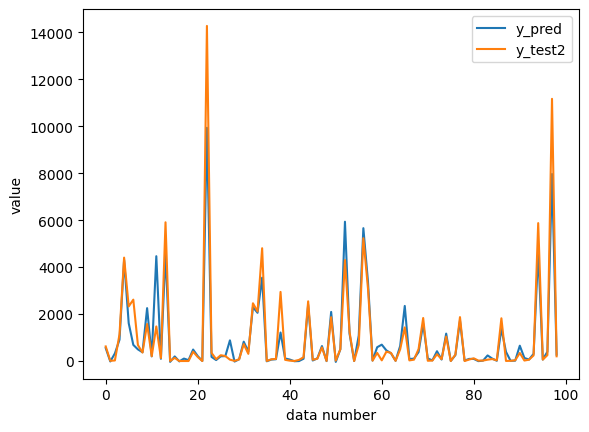

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train2, y_train2)
y_pred = catboost_ori.predict(X_test2)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models2 = models2.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
6:	learn: 1886.2922619	total: 8.87ms	remaining: 1.26s
7:	learn: 1849.4673959	total: 10.2ms	remaining: 1.26s
8:	learn: 1814.7212500	total: 11.5ms	remaining: 1.26s
9:	learn: 1783.4443269	total: 12.9ms	remaining: 1.27s
10:	learn: 1752.0951744	total: 14.2ms	remaining: 1.28s
11:	learn: 1725.8498575	total: 15.6ms	remaining: 1.28s
12:	learn: 1700.3926260	total: 16.9ms	remaining: 1.28s
13:	learn: 1671.2972680	total: 18.2ms	remaining: 1.28s
14:	learn: 1647.8435015	total: 19.5ms	remaining: 1.28s
15:	learn: 1620.8898296	total: 20.9ms	remaining: 1.28s
16:	learn: 1594.4525127	total: 22.1ms	remaining: 1.28s
17:	learn: 1568.6634932	total: 23.5ms	remaining: 1.28s
18:	learn: 1543.6787735	total: 24.8ms	remaining: 1.28s
19:	learn: 1521.1989190	total: 26.2ms	remaining: 1.28s
20:	learn: 1497.4237461	total: 27.5ms	remaining: 1.28s
21:	learn: 1473.3095707	total: 28.8ms	remaining: 1.28s
22:	learn: 1451.3472887	total: 30.1ms	remaining: 1.28s
23:	learn: 1429.68

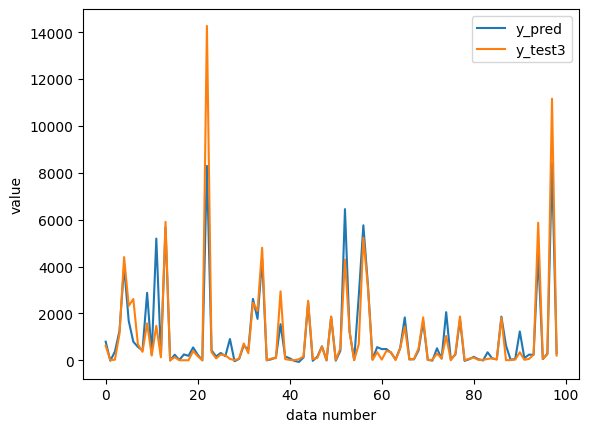

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train3, y_train3)
y_pred = catboost_ori.predict(X_test3)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models3 = models3.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
6:	learn: 1872.4347544	total: 6.36ms	remaining: 902ms
7:	learn: 1837.9912149	total: 7.27ms	remaining: 901ms
8:	learn: 1807.5644587	total: 8.22ms	remaining: 906ms
9:	learn: 1772.6719562	total: 9.08ms	remaining: 899ms
10:	learn: 1742.7982758	total: 9.95ms	remaining: 895ms
11:	learn: 1707.7215414	total: 10.8ms	remaining: 893ms
12:	learn: 1679.9642165	total: 11.7ms	remaining: 888ms
13:	learn: 1650.5360237	total: 12.6ms	remaining: 887ms
14:	learn: 1624.6407360	total: 13.6ms	remaining: 890ms
15:	learn: 1598.9079766	total: 14.4ms	remaining: 886ms
16:	learn: 1570.8664749	total: 15.3ms	remaining: 887ms
17:	learn: 1543.4553345	total: 16.2ms	remaining: 885ms
18:	learn: 1518.5793371	total: 17.1ms	remaining: 884ms
19:	learn: 1494.8147237	total: 18ms	remaining: 882ms
20:	learn: 1469.2376071	total: 18.9ms	remaining: 881ms
21:	learn: 1445.7290542	total: 19.8ms	remaining: 882ms
22:	learn: 1422.4848637	total: 20.7ms	remaining: 880ms
23:	learn: 1396.1862

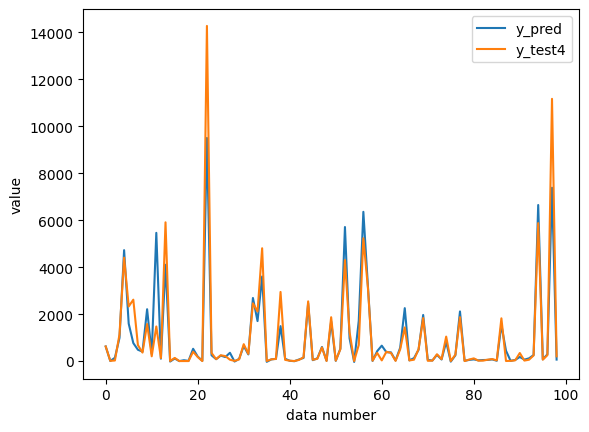

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train4, y_train4)
y_pred = catboost_ori.predict(X_test4)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models4 = models4.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
6:	learn: 1864.8521447	total: 5.81ms	remaining: 825ms
7:	learn: 1830.0552231	total: 6.64ms	remaining: 824ms
8:	learn: 1790.9888991	total: 7.45ms	remaining: 820ms
9:	learn: 1759.4608410	total: 8.24ms	remaining: 816ms
10:	learn: 1729.0937646	total: 9.08ms	remaining: 816ms
11:	learn: 1696.7557976	total: 9.95ms	remaining: 819ms
12:	learn: 1666.5241651	total: 10.8ms	remaining: 819ms
13:	learn: 1636.0717840	total: 11.7ms	remaining: 821ms
14:	learn: 1603.6354950	total: 12.5ms	remaining: 820ms
15:	learn: 1572.2556227	total: 13.3ms	remaining: 820ms
16:	learn: 1548.0306800	total: 14.2ms	remaining: 819ms
17:	learn: 1525.1669692	total: 15ms	remaining: 818ms
18:	learn: 1501.7118899	total: 15.8ms	remaining: 818ms
19:	learn: 1473.9292443	total: 16.7ms	remaining: 817ms
20:	learn: 1449.2280864	total: 17.5ms	remaining: 815ms
21:	learn: 1424.9267926	total: 18.3ms	remaining: 815ms
22:	learn: 1399.2863548	total: 19.1ms	remaining: 813ms
23:	learn: 1380.1521

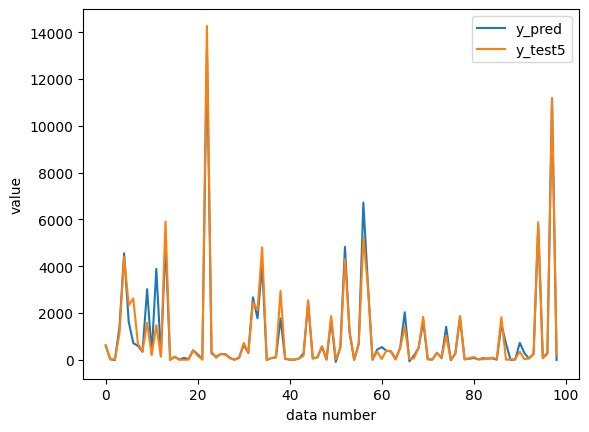

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train5, y_train5)
y_pred = catboost_ori.predict(X_test5)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models5 = models5.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

**Tuning**

Streaming output truncated to the last 5000 lines.
2:	learn: 2110.1233195	total: 1.48ms	remaining: 490ms
3:	learn: 2099.3855132	total: 2.16ms	remaining: 538ms
4:	learn: 2089.6752961	total: 2.85ms	remaining: 568ms
5:	learn: 2078.6430833	total: 3.56ms	remaining: 589ms
6:	learn: 2066.2877301	total: 4.27ms	remaining: 606ms
7:	learn: 2056.1132948	total: 5ms	remaining: 620ms
8:	learn: 2045.5768426	total: 5.68ms	remaining: 625ms
9:	learn: 2034.2470168	total: 6.39ms	remaining: 633ms
10:	learn: 2024.2739982	total: 7.08ms	remaining: 636ms
11:	learn: 2013.8165185	total: 7.75ms	remaining: 638ms
12:	learn: 2001.9393901	total: 8.4ms	remaining: 638ms
13:	learn: 1991.3030617	total: 9.08ms	remaining: 640ms
14:	learn: 1980.7573745	total: 9.78ms	remaining: 642ms
15:	learn: 1970.2831776	total: 10.5ms	remaining: 644ms
16:	learn: 1958.2485495	total: 10.9ms	remaining: 632ms
17:	learn: 1948.2432128	total: 11.6ms	remaining: 632ms
18:	learn: 1937.0758115	total: 12.3ms	remaining: 633ms
19:	learn: 1927.1244172	to

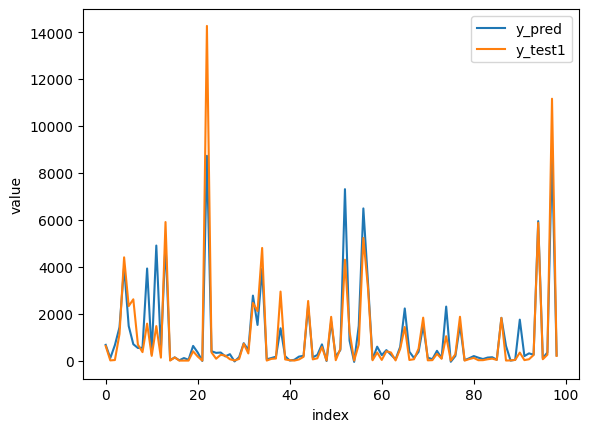

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train1, y_train1)
y_pred = catboost.predict(X_test1)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2110.2451863	total: 3.89ms	remaining: 1.29s
3:	learn: 2099.5028401	total: 4.5ms	remaining: 1.12s
4:	learn: 2089.8186483	total: 5.18ms	remaining: 1.03s
5:	learn: 2078.7948246	total: 6.72ms	remaining: 1.11s
6:	learn: 2067.0451026	total: 7.33ms	remaining: 1.04s
7:	learn: 2056.8131718	total: 9.69ms	remaining: 1.2s
8:	learn: 2046.2744593	total: 10.2ms	remaining: 1.12s
9:	learn: 2034.9308860	total: 11.3ms	remaining: 1.11s
10:	learn: 2024.9430820	total: 12.1ms	remaining: 1.09s
11:	learn: 2014.4164774	total: 13.2ms	remaining: 1.08s
12:	learn: 2002.5294568	total: 13.8ms	remaining: 1.05s
13:	learn: 1991.0540286	total: 14.2ms	remaining: 1s
14:	learn: 1980.8580842	total: 14.6ms	remaining: 959ms
15:	learn: 1970.3788682	total: 15ms	remaining: 921ms
16:	learn: 1958.3502966	total: 15.4ms	remaining: 891ms
17:	learn: 1948.3312953	total: 15.8ms	remaining: 860ms
18:	learn: 1937.1602116	total: 16.1ms	remaining: 834ms
19:	learn: 1927.6964424	total

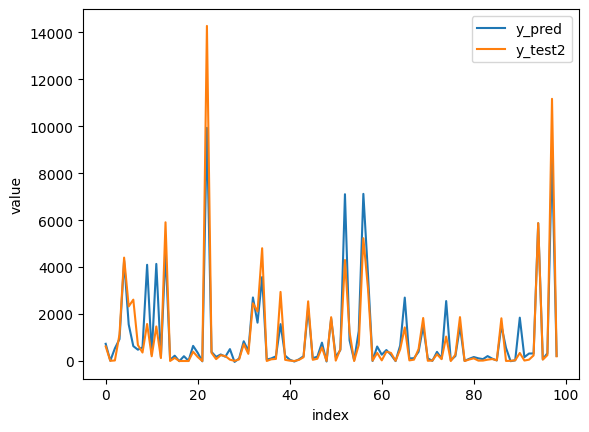

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train2, y_train2)
y_pred = catboost.predict(X_test2)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2111.3332020	total: 1.64ms	remaining: 544ms
3:	learn: 2099.9416702	total: 2.38ms	remaining: 592ms
4:	learn: 2087.6780523	total: 3.11ms	remaining: 619ms
5:	learn: 2076.4457818	total: 3.83ms	remaining: 635ms
6:	learn: 2065.2580516	total: 4.56ms	remaining: 646ms
7:	learn: 2054.0130506	total: 5.36ms	remaining: 665ms
8:	learn: 2045.2423097	total: 6.16ms	remaining: 679ms
9:	learn: 2035.4520662	total: 6.91ms	remaining: 684ms
10:	learn: 2023.7745921	total: 7.72ms	remaining: 694ms
11:	learn: 2012.5077080	total: 8.51ms	remaining: 701ms
12:	learn: 2001.6626027	total: 9.31ms	remaining: 707ms
13:	learn: 1989.1435806	total: 10.1ms	remaining: 714ms
14:	learn: 1977.4924376	total: 11ms	remaining: 720ms
15:	learn: 1967.2640982	total: 11.8ms	remaining: 727ms
16:	learn: 1955.6034993	total: 12.6ms	remaining: 730ms
17:	learn: 1943.6997298	total: 14ms	remaining: 762ms
18:	learn: 1935.1885063	total: 15.5ms	remaining: 799ms
19:	learn: 1923.7613649	to

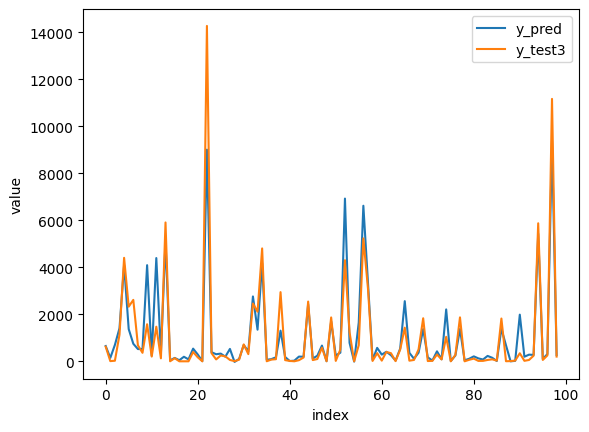

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train3, y_train3)
y_pred = catboost.predict(X_test3)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2109.9637994	total: 1.87ms	remaining: 621ms
3:	learn: 2098.1358843	total: 2.49ms	remaining: 621ms
4:	learn: 2087.4724374	total: 3.08ms	remaining: 612ms
5:	learn: 2075.5325397	total: 3.68ms	remaining: 609ms
6:	learn: 2065.9617509	total: 4.22ms	remaining: 599ms
7:	learn: 2054.1357468	total: 4.8ms	remaining: 595ms
8:	learn: 2042.7106577	total: 5.42ms	remaining: 597ms
9:	learn: 2031.5368892	total: 5.95ms	remaining: 589ms
10:	learn: 2020.3381586	total: 6.92ms	remaining: 622ms
11:	learn: 2009.3294770	total: 7.97ms	remaining: 656ms
12:	learn: 1998.7600562	total: 8.98ms	remaining: 682ms
13:	learn: 1987.4032420	total: 9.89ms	remaining: 697ms
14:	learn: 1976.9995397	total: 10.7ms	remaining: 704ms
15:	learn: 1966.6634449	total: 11.7ms	remaining: 718ms
16:	learn: 1955.5649205	total: 12.5ms	remaining: 726ms
17:	learn: 1945.4719917	total: 13.6ms	remaining: 740ms
18:	learn: 1934.6433444	total: 14.5ms	remaining: 747ms
19:	learn: 1923.5599279

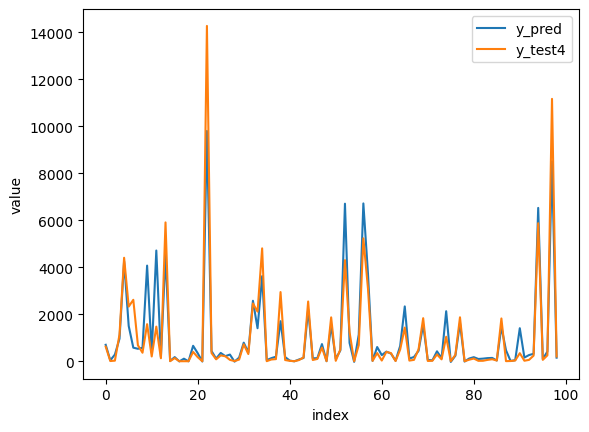

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train4, y_train4)
y_pred = catboost.predict(X_test4)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2108.7147689	total: 1.42ms	remaining: 471ms
3:	learn: 2096.4444813	total: 3.93ms	remaining: 980ms
4:	learn: 2085.8145594	total: 4.91ms	remaining: 977ms
5:	learn: 2072.7199463	total: 11ms	remaining: 1.82s
6:	learn: 2059.8069356	total: 11.9ms	remaining: 1.69s
7:	learn: 2046.7218142	total: 12.3ms	remaining: 1.53s
8:	learn: 2035.5276929	total: 12.7ms	remaining: 1.4s
9:	learn: 2023.2989432	total: 13.2ms	remaining: 1.3s
10:	learn: 2011.2441269	total: 13.6ms	remaining: 1.22s
11:	learn: 1999.4841738	total: 15.3ms	remaining: 1.26s
12:	learn: 1988.8689142	total: 15.8ms	remaining: 1.2s
13:	learn: 1976.6125219	total: 16.2ms	remaining: 1.14s
14:	learn: 1965.4962543	total: 16.6ms	remaining: 1.09s
15:	learn: 1953.9615285	total: 17ms	remaining: 1.05s
16:	learn: 1943.2290975	total: 17.4ms	remaining: 1.01s
17:	learn: 1932.5068705	total: 21.3ms	remaining: 1.16s
18:	learn: 1922.1097961	total: 22.5ms	remaining: 1.16s
19:	learn: 1911.8135196	total

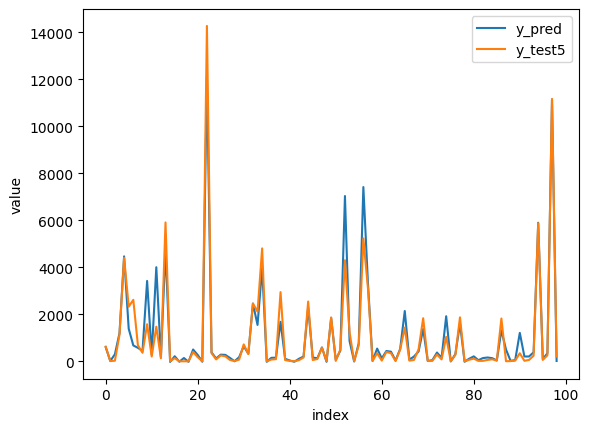

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train5, y_train5)
y_pred = catboost.predict(X_test5)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

### **Stacking Regression**
- Regressors = CatBoost and Random Forest
- Meta Regressor = Huber

Streaming output truncated to the last 5000 lines.
2:	learn: 2110.1233195	total: 1.54ms	remaining: 512ms
3:	learn: 2099.3855132	total: 2.02ms	remaining: 502ms
4:	learn: 2089.6752961	total: 2.53ms	remaining: 504ms
5:	learn: 2078.6430833	total: 3ms	remaining: 497ms
6:	learn: 2066.2877301	total: 3.48ms	remaining: 493ms
7:	learn: 2056.1132948	total: 3.92ms	remaining: 486ms
8:	learn: 2045.5768426	total: 4.38ms	remaining: 483ms
9:	learn: 2034.2470168	total: 4.83ms	remaining: 478ms
10:	learn: 2024.2739982	total: 5.32ms	remaining: 479ms
11:	learn: 2013.8165185	total: 5.79ms	remaining: 477ms
12:	learn: 2001.9393901	total: 6.28ms	remaining: 477ms
13:	learn: 1991.3030617	total: 6.76ms	remaining: 476ms
14:	learn: 1980.7573745	total: 7.22ms	remaining: 474ms
15:	learn: 1970.2831776	total: 7.71ms	remaining: 474ms
16:	learn: 1958.2485495	total: 8.38ms	remaining: 485ms
17:	learn: 1948.2432128	total: 9.07ms	remaining: 495ms
18:	learn: 1937.0758115	total: 9.7ms	remaining: 501ms
19:	learn: 1927.1244172	to

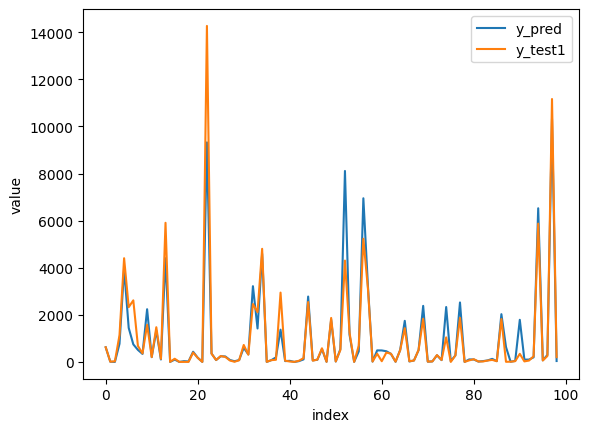

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train1, y_train1)
y_pred = stacking.predict(X_test1)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models1 = models1.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (1)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2110.2451863	total: 1.55ms	remaining: 516ms
3:	learn: 2099.5028401	total: 2.24ms	remaining: 557ms
4:	learn: 2089.8186483	total: 2.85ms	remaining: 566ms
5:	learn: 2078.7948246	total: 3.5ms	remaining: 580ms
6:	learn: 2067.0451026	total: 4.18ms	remaining: 594ms
7:	learn: 2056.8131718	total: 4.85ms	remaining: 601ms
8:	learn: 2046.2744593	total: 5.44ms	remaining: 599ms
9:	learn: 2034.9308860	total: 6.08ms	remaining: 602ms
10:	learn: 2024.9430820	total: 6.72ms	remaining: 605ms
11:	learn: 2014.4164774	total: 7.3ms	remaining: 601ms
12:	learn: 2002.5294568	total: 7.89ms	remaining: 599ms
13:	learn: 1991.0540286	total: 8.52ms	remaining: 600ms
14:	learn: 1980.8580842	total: 9.16ms	remaining: 601ms
15:	learn: 1970.3788682	total: 9.77ms	remaining: 601ms
16:	learn: 1958.3502966	total: 10.5ms	remaining: 605ms
17:	learn: 1948.3312953	total: 11.1ms	remaining: 606ms
18:	learn: 1937.1602116	total: 11.8ms	remaining: 609ms
19:	learn: 1927.6964424	

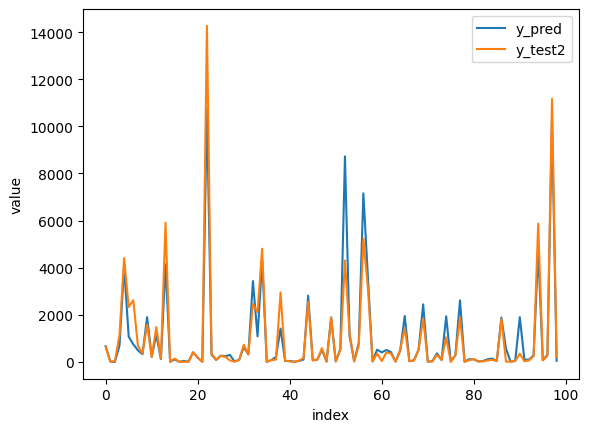

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train2, y_train2)
y_pred = stacking.predict(X_test2)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models2 = models2.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (2)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2111.3332020	total: 2.46ms	remaining: 816ms
3:	learn: 2099.9416702	total: 3.42ms	remaining: 851ms
4:	learn: 2087.6780523	total: 4.13ms	remaining: 822ms
5:	learn: 2076.4457818	total: 5.13ms	remaining: 849ms
6:	learn: 2065.2580516	total: 5.76ms	remaining: 818ms
7:	learn: 2054.0130506	total: 6.64ms	remaining: 824ms
8:	learn: 2045.2423097	total: 7.63ms	remaining: 840ms
9:	learn: 2035.4520662	total: 8.29ms	remaining: 821ms
10:	learn: 2023.7745921	total: 8.96ms	remaining: 805ms
11:	learn: 2012.5077080	total: 9.58ms	remaining: 789ms
12:	learn: 2001.6626027	total: 10.2ms	remaining: 777ms
13:	learn: 1989.1435806	total: 10.9ms	remaining: 767ms
14:	learn: 1977.4924376	total: 11.5ms	remaining: 758ms
15:	learn: 1967.2640982	total: 12.4ms	remaining: 765ms
16:	learn: 1955.6034993	total: 13.8ms	remaining: 796ms
17:	learn: 1943.6997298	total: 14.7ms	remaining: 802ms
18:	learn: 1935.1885063	total: 15.3ms	remaining: 792ms
19:	learn: 1923.761364

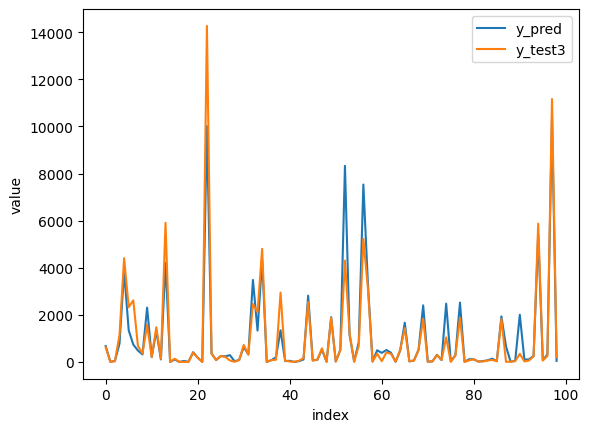

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train3, y_train3)
y_pred = stacking.predict(X_test3)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models3 = models3.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (3)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2109.9637994	total: 1.8ms	remaining: 599ms
3:	learn: 2098.1358843	total: 2.64ms	remaining: 658ms
4:	learn: 2087.4724374	total: 3.23ms	remaining: 643ms
5:	learn: 2075.5325397	total: 3.79ms	remaining: 627ms
6:	learn: 2065.9617509	total: 4.33ms	remaining: 614ms
7:	learn: 2054.1357468	total: 4.86ms	remaining: 603ms
8:	learn: 2042.7106577	total: 5.4ms	remaining: 595ms
9:	learn: 2031.5368892	total: 5.94ms	remaining: 588ms
10:	learn: 2020.3381586	total: 6.5ms	remaining: 584ms
11:	learn: 2009.3294770	total: 7.09ms	remaining: 584ms
12:	learn: 1998.7600562	total: 7.64ms	remaining: 580ms
13:	learn: 1987.4032420	total: 8.46ms	remaining: 596ms
14:	learn: 1976.9995397	total: 9.09ms	remaining: 597ms
15:	learn: 1966.6634449	total: 9.67ms	remaining: 595ms
16:	learn: 1955.5649205	total: 10.3ms	remaining: 593ms
17:	learn: 1945.4719917	total: 10.9ms	remaining: 593ms
18:	learn: 1934.6433444	total: 11.4ms	remaining: 589ms
19:	learn: 1923.5599279	t

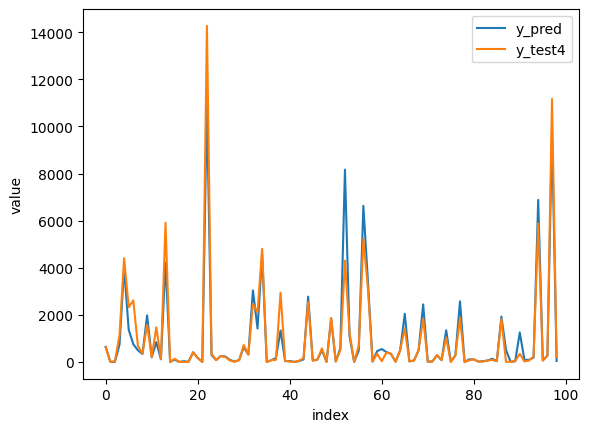

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train4, y_train4)
y_pred = stacking.predict(X_test4)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models4 = models4.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (4)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
2:	learn: 2108.7147689	total: 1.8ms	remaining: 598ms
3:	learn: 2096.4444813	total: 2.37ms	remaining: 590ms
4:	learn: 2085.8145594	total: 2.91ms	remaining: 580ms
5:	learn: 2072.7199463	total: 3.47ms	remaining: 575ms
6:	learn: 2059.8069356	total: 4.04ms	remaining: 574ms
7:	learn: 2046.7218142	total: 4.58ms	remaining: 569ms
8:	learn: 2035.5276929	total: 5.14ms	remaining: 566ms
9:	learn: 2023.2989432	total: 5.68ms	remaining: 563ms
10:	learn: 2011.2441269	total: 6.22ms	remaining: 560ms
11:	learn: 1999.4841738	total: 6.77ms	remaining: 558ms
12:	learn: 1988.8689142	total: 7.3ms	remaining: 555ms
13:	learn: 1976.6125219	total: 7.86ms	remaining: 554ms
14:	learn: 1965.4962543	total: 8.43ms	remaining: 554ms
15:	learn: 1953.9615285	total: 9.03ms	remaining: 556ms
16:	learn: 1943.2290975	total: 9.59ms	remaining: 555ms
17:	learn: 1932.5068705	total: 10.1ms	remaining: 552ms
18:	learn: 1922.1097961	total: 10.6ms	remaining: 549ms
19:	learn: 1911.8135196	

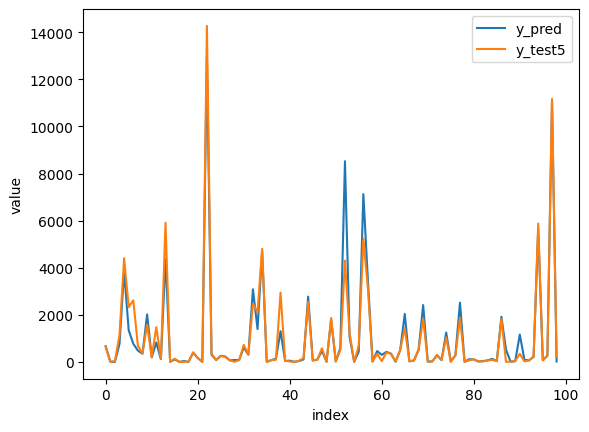

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train5, y_train5)
y_pred = stacking.predict(X_test5)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models5 = models5.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (5)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

## **Evaluation**

### **Result**

**Patient ID, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models1.sort_values(by="MAE").reset_index(drop=True)
mse = models1.sort_values(by="MSE").reset_index(drop=True)
rmse = models1.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models1.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models1.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(models1['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(models1)
models1['Score'] = pd.DataFrame(scores)
models1['Rank'] = models1['Score'].rank().astype(int)
models1.sort_values(by="Rank").reset_index(drop=True)

Model  Duration         MAE           MSE         RMSE  \
0      StackingRegressor  3.840214  293.355208  5.999857e+05   774.587435   
1  RandomForestRegressor  0.454014  303.385858  6.731297e+05   820.444808   
2      CatBoostRegressor  1.580385  349.054454  8.717564e+05   933.678958   
3                  Huber  0.024026  757.376194  3.467973e+06  1862.249346   

   RMSE (Cross-Validation)  Accuracy  Score  Rank  
0              1028.015966  0.979798      3     1  
1              1021.495949  0.979798      4     2  
2               910.292657  0.909091      8     3  
3              2413.368957  0.848485     15     4

**Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models2.sort_values(by="MAE").reset_index(drop=True)
mse = models2.sort_values(by="MSE").reset_index(drop=True)
rmse = models2.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models2.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models2.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(models2['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(models2)
models2['Score'] = pd.DataFrame(scores)
models2['Rank'] = models2['Score'].rank().astype(int)
models2.sort_values(by="Rank").reset_index(drop=True)

Model  Duration         MAE           MSE         RMSE  \
0  RandomForestRegressor  0.638251  307.459386  5.452316e+05   738.397975   
1      CatBoostRegressor  2.495502  311.191404  5.721870e+05   756.430413   
2      StackingRegressor  3.148734  311.409951  5.695404e+05   754.678972   
3                  Huber  0.048577  771.454660  3.994129e+06  1998.531712   

   RMSE (Cross-Validation)  Accuracy  Score  Rank  
0               980.364376  0.959596      1     1  
1               945.702456  0.919192      7     2  
2               984.099922  0.959596      7     2  
3              3257.530349  0.909091     15     4

**Patient ID, Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models3.sort_values(by="MAE").reset_index(drop=True)
mse = models3.sort_values(by="MSE").reset_index(drop=True)
rmse = models3.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models3.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models3.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(models3['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(models3)
models3['Score'] = pd.DataFrame(scores)
models3['Rank'] = models3['Score'].rank().astype(int)
models3.sort_values(by="Rank").reset_index(drop=True)

Model  Duration         MAE           MSE         RMSE  \
0      StackingRegressor  4.304538  308.547331  6.033256e+05   776.740352   
1  RandomForestRegressor  0.454211  320.454156  6.737370e+05   820.814861   
2      CatBoostRegressor  1.652519  352.600432  8.100225e+05   900.012490   
3                  Huber  0.036170  757.377072  3.467973e+06  1862.249507   

   RMSE (Cross-Validation)  Accuracy  Score  Rank  
0              1030.829386  0.959596      3     1  
1              1030.168306  0.959596      4     2  
2               996.150697  0.919192      8     3  
3              2445.731358  0.848485     15     4

**Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models4.sort_values(by="MAE").reset_index(drop=True)
mse = models4.sort_values(by="MSE").reset_index(drop=True)
rmse = models4.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models4.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models4.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(models4['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(models4)
models4['Score'] = pd.DataFrame(scores)
models4['Rank'] = models4['Score'].rank().astype(int)
models4.sort_values(by="Rank").reset_index(drop=True)

Model  Duration         MAE           MSE         RMSE  \
0      StackingRegressor  3.074184  275.166230  4.593806e+05   677.776243   
1  RandomForestRegressor  0.526080  281.334752  5.022426e+05   708.690758   
2      CatBoostRegressor  1.162449  319.883989  7.190922e+05   847.993021   
3                  Huber  0.033087  772.333894  3.996080e+06  1999.019724   

   RMSE (Cross-Validation)  Accuracy  Score  Rank  
0               986.841500  0.979798      2     1  
1               976.736518  0.969697      4     2  
2               981.968853  0.929293      9     3  
3              3255.484870  0.898990     15     4

**Quantitative UACR and Urinary Creatinine**

In [ ]:
mae = models5.sort_values(by="MAE").reset_index(drop=True)
mse = models5.sort_values(by="MSE").reset_index(drop=True)
rmse = models5.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models5.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models5.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(models5['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(models5)
models5['Score'] = pd.DataFrame(scores)
models5['Rank'] = models5['Score'].rank().astype(int)
models5.sort_values(by="Rank").reset_index(drop=True)

Model  Duration         MAE           MSE         RMSE  \
0      CatBoostRegressor  1.920377  195.300726  2.039683e+05   451.628461   
1  RandomForestRegressor  0.866806  235.557238  3.409647e+05   583.921843   
2      StackingRegressor  3.026665  238.431688  3.743464e+05   611.838548   
3                  Huber  0.028623  721.420174  3.330931e+06  1825.083931   

   RMSE (Cross-Validation)  Accuracy  Score  Rank  
0               890.729286  0.959596      2     1  
1               971.367597  0.979798      5     2  
2               975.587226  0.989899      8     3  
3              3256.866641  0.858586     15     4

### **Stacking Regression**

In [ ]:
mae = stacking_models.sort_values(by="MAE").reset_index(drop=True)
mse = stacking_models.sort_values(by="MSE").reset_index(drop=True)
rmse = stacking_models.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = stacking_models.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = stacking_models.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(stacking_models['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(stacking_models)
stacking_models['Score'] = pd.DataFrame(scores)
stacking_models['Rank'] = stacking_models['Score'].rank().astype(int)
stacking_models.sort_values(by="Rank").reset_index(drop=True)

Model  Duration         MAE            MSE        RMSE  \
0  StackingRegressor (5)  3.026665  238.431688  374346.408891  611.838548   
1  StackingRegressor (4)  3.074184  275.166230  459380.635077  677.776243   
2  StackingRegressor (1)  3.840214  293.355208  599985.694743  774.587435   
3  StackingRegressor (2)  3.148734  311.409951  569540.350049  754.678972   
4  StackingRegressor (3)  4.304538  308.547331  603325.574655  776.740352   

   RMSE (Cross-Validation)  Accuracy  Score  Rank  
0               975.587226  0.989899      0     1  
1               986.841500  0.979798      7     2  
2              1028.015966  0.979798     12     3  
3               984.099922  0.959596     12     3  
4              1030.829386  0.959596     19     5

Notes:
1. Patient ID, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
2. Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
3. Patient ID, Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
4. Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
5. Quantitative UACR and Urinary Creatinine

Best at number 5, but Stacking Regression is worse than other models.
